## EDA

The quality of the data! Dirty data usually includes: 
- missing data
- abnormal data
- inconsistant data
- repeated data
- special symbols

#### Missing data
- Why there is a missing data in the dataset?
 * data temporarly not avaliable
 * cost
 * considered not important when design, but considered important now
 * simply N/A
 * mis-understanding the question
 * device/storage/network failure
- Sometimes, having missing data is not abnormal.
 * the name of spose
 * income of a child
 * ...
- Impact of missing data
 * when modeling, lack useful information
 * the uncertainty of the data
 * wrong insights
 * your tools may not support to analyzing such data
 
What can you do?
- identifying abnormal data or we called 'deviations'
- statistics
- 3-$\sigma$ rules
- box analysis

In [1]:
# pip install xlrd

In [2]:
import pandas as pd

catering_sale = 'tipdm-ch3/catering_sale.xls'
data = pd.read_excel(catering_sale, index_col='date')
print(data.describe())
print('The actual length of the data is', len(data))

                销量
count   200.000000
mean   2755.214700
std     751.029772
min      22.000000
25%    2451.975000
50%    2655.850000
75%    3026.125000
max    9106.440000
The actual length of the data is 201


Populating the interactive namespace from numpy and matplotlib


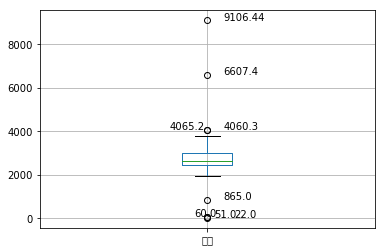

In [3]:
import pandas as pd

catering_sale = 'tipdm-ch3/catering_sale.xls'
data = pd.read_excel(catering_sale, index_col='date')

import matplotlib.pyplot as plt
%pylab inline

plt.figure()
p = data.boxplot(return_type = 'dict')

# 
x = p['fliers'][0].get_xdata()
y = p['fliers'][0].get_ydata()
y.sort()

# Plot 
for i in range(len(x)):
    if i > 0:
        plt.annotate(y[i], xy = (x[i], y[i]), xytext = (x[i]+0.05-0.8/(y[i]-y[i-1]), y[i]))
    else:
        plt.annotate(y[i], xy = (x[i], y[i]), xytext = (x[i]+0.08, y[i]))

plt.show()

In [4]:
print(p.keys())

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])


In [5]:
from __future__ import print_function
import pandas as pd

catering_sale = 'tipdm-ch3/catering_sale.xls'
data = pd.read_excel(catering_sale, index_col='date')
data = data[(data[u'销量'] > 400) & (data[u'销量'] < 5000)]
statistics = data.describe()

statistics.loc['range'] = statistics.loc['max'] - statistics.loc['min']
statistics.loc['var'] = statistics.loc['std'] / statistics.loc['mean']
statistics.loc['dis'] = statistics.loc['75%'] - statistics.loc['25%']

print(statistics)

                销量
count   195.000000
mean   2744.595385
std     424.739407
min     865.000000
25%    2460.600000
50%    2655.900000
75%    3023.200000
max    4065.200000
range  3200.200000
var       0.154755
dis     562.600000


#### Distribution of the data
- max - min 
- how many bins and their ranges
- plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002772D6B0F98>]], dtype=object)

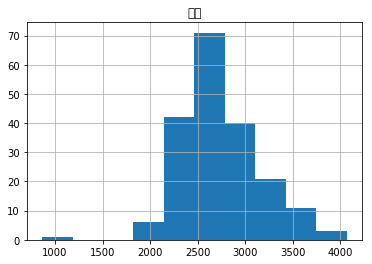

In [6]:
# Try histogram? histogram is convenient but we need fine-grained and well-designed ones.
data.hist(bins=10, normed=0) # what is the impact of changing # of bins and normed?

#### Comparison
- Absolute
- Relative
 * structure: individual/sum
 * relative proportion
 * same data, different criteria (time, space, ...)
 * density (two different concepts)
 * timeseries

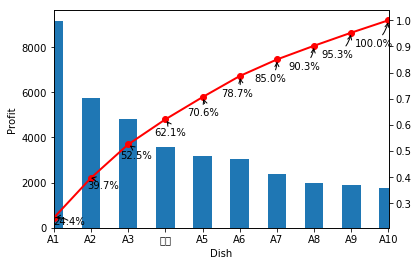

In [7]:
from __future__ import print_function
import pandas as pd

dish_profit = 'tipdm-ch3/catering_dish_profit.xls'
data = pd.read_excel(dish_profit, index_col = u'菜品名')
data = data[u'盈利'].copy()
data.index.name = "Dish"
data.sort_values(ascending=False)

import matplotlib.pyplot as plt

plt.figure()
data.plot(kind='bar')
plt.ylabel("Profit")
p = 1.0*data.cumsum()/data.sum()
p.plot(color='r', secondary_y=True, style='-o', linewidth=2)
for i in range(len(p)):
    plt.annotate(format(p[i], '.1%'),
                 xy=(i, p[i]),
                 xytext=(i*0.9, p[i]*0.9),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))
plt.show()

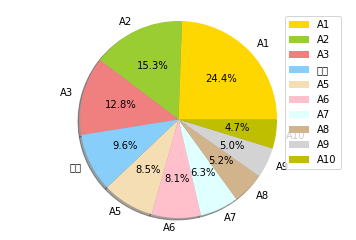

In [8]:
#data
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'wheat', 'pink', 'lightcyan', 'tan', 'lightgray', 'y']

plt.pie(data, labels = data.index, shadow=True, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(data.index, loc="best")
plt.show()

In [9]:
from __future__ import print_function
import pandas as pd

catering_sale = "tipdm-ch3/catering_sale_all.xls"
data = pd.read_excel(catering_sale, index_col=u"日期")

data.corr()
print(data.corr()[u"百合酱蒸凤爪"])
print(data[u"百合酱蒸凤爪"].corr(data[u"翡翠蒸香茜饺"]))

百合酱蒸凤爪     1.000000
翡翠蒸香茜饺     0.009206
金银蒜汁蒸排骨    0.016799
乐膳真味鸡      0.455638
蜜汁焗餐包      0.098085
生炒菜心       0.308496
铁板酸菜豆腐     0.204898
香煎韭菜饺      0.127448
香煎罗卜糕     -0.090276
原汁原味菜心     0.428316
Name: 百合酱蒸凤爪, dtype: float64
0.00920580305184
